In [18]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import numpy as np
from scipy.stats import norm, dirichlet, gamma
import matplotlib.pyplot as plt

# Load the galaxies data (here I generate synthetic data)
df = pd.read_csv("jdp_views_test.csv")

In [20]:
df.head()

,jdp_visits,user_token
0,0,js_1814393
1,3,js_658987
2,0,js_534686
3,2,js_332088
4,5,js_313533


1 -1713.0051318066498
2 -1713.954970696653
3 -1698.555508032077
4 -1676.4304137842355
5 -1660.5025749966462
6 -1655.149876053884
7 -1651.8723954922157
8 -1647.6080166967783
9 -1643.433275370744
10 -1640.6206181161938
11 -1639.3174480616892
12 -1638.975367186753
13 -1639.047305227618
14 -1639.225580766642
15 -1639.3890378143578
16 -1639.5081292545071
17 -1639.5864841884372
18 -1639.635327835523
19 -1639.6648531994554
20 -1639.6823805797396
21 -1639.6926734940432
22 -1639.6986788218974
23 -1639.7021689357694
24 -1639.704192544833
25 -1639.7053642196547


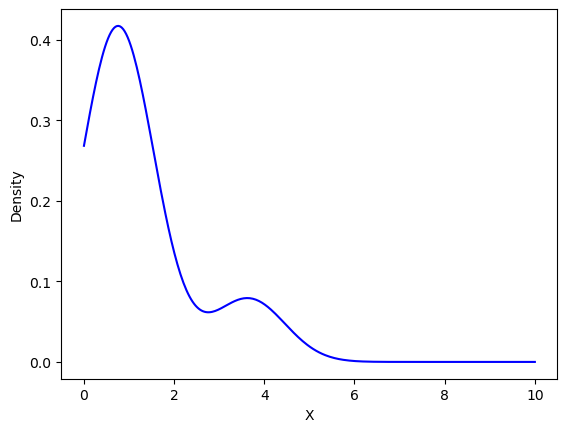

In [35]:
# Make sure x is within the range of 0 to 10

x = df['jdp_visits'].to_numpy()


n = len(x)
KK = 2  # Number of components

# Initialize the parameters
w = np.ones(KK) / KK
mu = np.linspace(0, 10, KK)
sigma = np.std(x) / np.sqrt(KK)

epsilon = 1e-6
s = 0
sw = False
KL = -np.inf
KL_out = []

while not sw:
    # E step
    v = np.zeros((n, KK))
    for k in range(KK):
        v[:, k] = np.log(w[k]) + norm.logpdf(x, mu[k], sigma)
    
    v = np.exp(v - np.max(v, axis=1)[:, np.newaxis])
    v /= np.sum(v, axis=1)[:, np.newaxis]
    
    # M step
    # Weights
    w = np.mean(v, axis=0)
    
    # Means
    mu = np.sum(v * x[:, np.newaxis], axis=0) / np.sum(v, axis=0)
    
    # Standard deviations
    sigma = np.sqrt(np.sum(v * (x[:, np.newaxis] - mu) ** 2) / np.sum(v))
    
    # Check convergence
    KLn = np.sum(v * (np.log(w) + norm.logpdf(x[:, np.newaxis], mu, sigma)))
    if abs(KLn - KL) / abs(KLn) < epsilon:
        sw = True
    
    KL = KLn
    KL_out.append(KL)
    s += 1
    print(f"{s} {KLn}")

# Generate a sequence for density prediction
xx = np.linspace(0, 10, 300)
density_EM = np.zeros(len(xx))
for s, x_val in enumerate(xx):
    for k in range(KK):
        density_EM[s] += w[k] * norm.pdf(x_val, mu[k], sigma)

# Plotting
plt.plot(xx, density_EM, color="blue")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

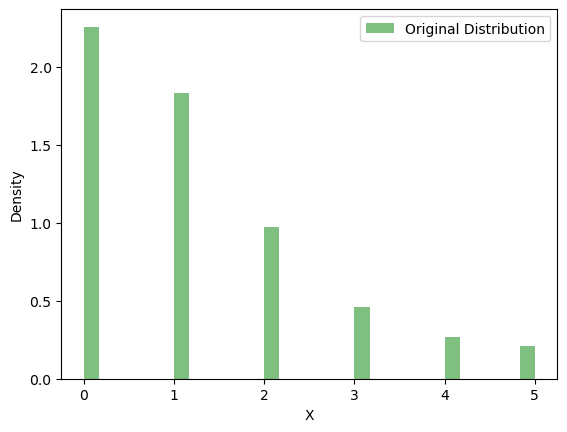

In [36]:

# Plot the original distribution (histogram of the data)
plt.hist(x, bins=30, density=True, alpha=0.5, color="green", label='Original Distribution')

plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

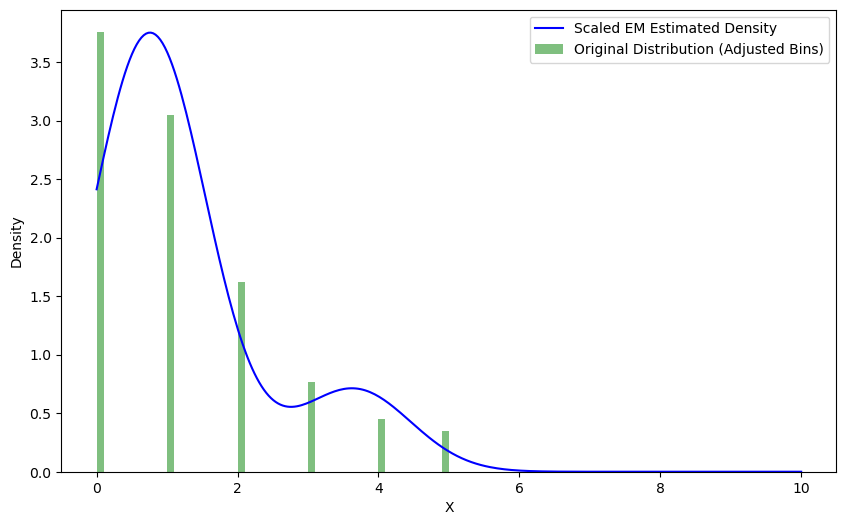

In [40]:
# Approach 1: Scale the GMM curve
scaled_density_EM = 9 * density_EM

# Approach 2: Adjust the number of bins in the histogram
num_bins = 50  # You can change this number to see different effects

# Plotting
plt.figure(figsize=(10, 6))

# Plot the scaled EM Estimated Density
plt.plot(xx, scaled_density_EM, color="blue", label='Scaled EM Estimated Density')

# Plot the original distribution (histogram of the data) with adjusted number of bins
plt.hist(x, bins=num_bins, density=True, alpha=0.5, color="green", label='Original Distribution (Adjusted Bins)')

plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()